In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
index_names = ['engine', 'cycle']
# Operational conditions: altitude, mach_number and throttle_resolver_angle
operational_condition_names = ['altitude', 'TRA', 'mach_nr']
sensor_names = ['T2', # total temperature at fan inlet
                'T24',# total temperature at LPC outlet
                'T30', # total temperature at HPC outlet
                'T50', # total temperature at LPT outlet
                'P2', # Pressure at fan inlet
                'P15', #Total pressure in bypass-duct
                'P30', #Total pressure at HPC outlet
                'Nf', #Physical fan speed rpm
                'Nc', #Physical core speed rpm
                'epr', #Engine pressure ratio (P50/P2)
                'Ps30', #Static pressure at HPC outlet
                'phi', #Ratio offuel flow to Ps30
                'NRf', #Corrected fan speed
                'NRc', #Corrected core speed
                'BPR', #Bypass Ratio
                'farB', #Burner fuel-air ratio
                'htBleed', #Bleed Enthalpy
                'Nf_dmd', # Demanded fan speed rpm
                'PCNfR_dmd', #Demanded corrected fan speed rpm
                'W31', #HPT coolant bleed lbm/s
                'W32', #LPT coolant bleed
                ]
# options to visualize the datadrame
pd.set_option('display.width', 100)
col_names = index_names + operational_condition_names + sensor_names
df = pd.read_csv('data/train_FD001.txt', sep=' ', lineterminator='\n', header=0, index_col=False, names=col_names)

# drop the flat sensors
flat_sensors = ['mach_nr', 'T2', 'P2', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd']
df = df.drop(flat_sensors, inplace=False, axis=1)

print(df.columns)
print(df.head(5))


Index(['engine', 'cycle', 'altitude', 'TRA', 'T24', 'T30', 'T50', 'P15', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32'],
      dtype='object')
   engine  cycle  altitude     TRA     T24      T30      T50    P15     P30       Nf       Nc  \
0       1      2    0.0019 -0.0003  642.15  1591.82  1403.14  21.61  553.75  2388.04  9044.07   
1       1      3   -0.0043  0.0003  642.35  1587.99  1404.20  21.61  554.26  2388.08  9052.94   
2       1      4    0.0007  0.0000  642.35  1582.79  1401.87  21.61  554.45  2388.11  9049.48   
3       1      5   -0.0019 -0.0002  642.37  1582.85  1406.22  21.61  554.00  2388.06  9055.15   
4       1      6   -0.0043 -0.0001  642.10  1584.47  1398.37  21.61  554.67  2388.02  9049.68   

    Ps30     phi      NRf      NRc     BPR  htBleed    W31      W32  
0  47.49  522.28  2388.07  8131.49  8.4318      392  39.00  23.4236  
1  47.27  522.42  2388.03  8133.23  8.4178      390  38.95  23.3442  
2  47.13  522.86  2388.0

Text(0.5, 1.0, 'Engine3')

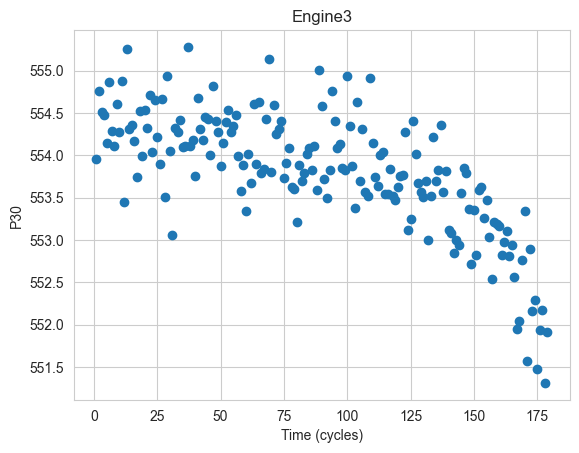

In [3]:
# condition monitoring signals
engine_id = 3
v2_engine1 = df.loc[df['engine'] == engine_id, 'P30']
time_engine1 = df.loc[df['engine'] == engine_id, 'cycle']
plt.scatter(time_engine1,v2_engine1)
plt.xlabel('Time (cycles)')
plt.ylabel('P30')
plt.title('Engine' + str(engine_id))

Text(0.5, 1.0, 'Engine3')

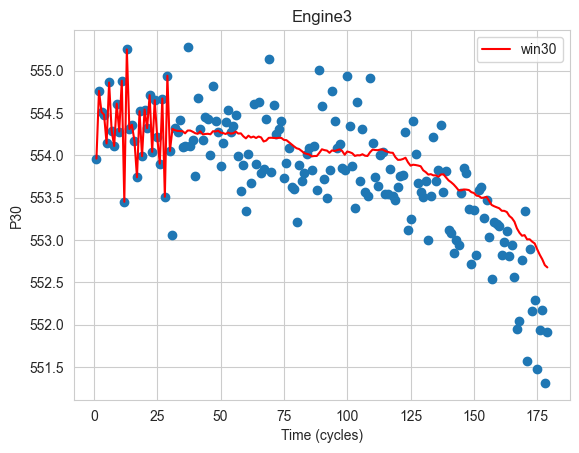

In [4]:
engine_id = 3
v2_engine1 = df.loc[df['engine'] == engine_id, 'P30']

param_window30 =  v2_engine1.rolling(30).mean()
param_window30 = list(v2_engine1.rolling(30).mean())

for i in range(30):
    param_window30[i] = v2_engine1.values[i]

param_window5 = v2_engine1.rolling(5).mean()
param_window100 = v2_engine1.rolling(100).mean()

time_engine1 = df.loc[df['engine'] == engine_id, 'cycle']
plt.scatter(time_engine1,v2_engine1)
plt.plot(time_engine1, param_window30, label='win30', c='red')
plt.legend()
plt.xlabel('Time (cycles)')
plt.ylabel('P30')
plt.title('Engine' + str(engine_id))


Text(0, 0.5, 'Operational Condition altitude')

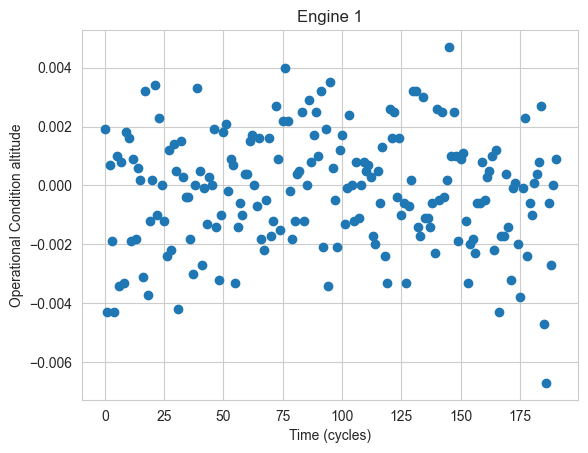

In [5]:
# operational conditions
op_condition_name = 'altitude'
op_engine1 = df.loc[df.engine == 1, op_condition_name]
plt.scatter(range(len(op_engine1)), op_engine1)
plt.xlabel('Time (cycles)')
plt.title('Engine 1')
plt.ylabel('Operational Condition ' + op_condition_name)

<Axes: >

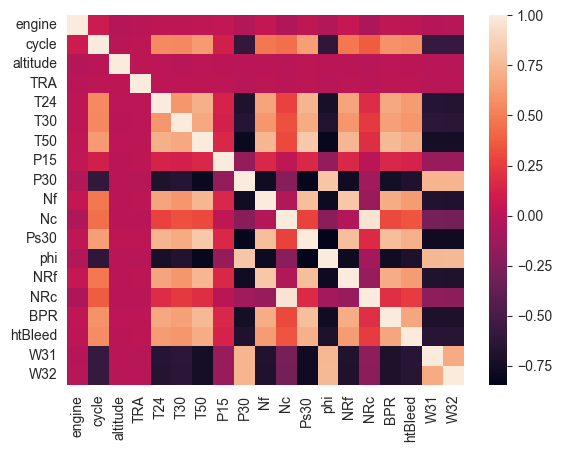

In [6]:
#correlation map of the dataset
sns.heatmap(df.corr())

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')# coolwarm
# check https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

,engine,cycle,altitude,TRA,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
engine,1.000000,0.078632,-0.017923,-0.006312,0.013991,0.012611,0.026041,0.026445,-0.031982,0.039889,-0.052130,0.024687,-0.031857,0.044146,-0.059500,0.022438,0.013449,-0.020478,-0.016367
cycle,0.078632,1.000000,-0.004551,0.016030,0.549840,0.543969,0.624557,0.105997,-0.595882,0.475969,0.443968,0.634403,-0.611366,0.477484,0.370326,0.588670,0.566978,-0.583555,-0.585888
altitude,-0.017923,-0.004551,1.000000,0.011640,0.009004,-0.005653,0.009530,-0.001338,-0.009420,-0.000435,-0.004292,0.011654,-0.001486,0.002302,-0.004474,0.007643,0.002587,-0.005692,-0.014541
TRA,-0.006312,0.016030,0.011640,1.000000,0.007152,0.009059,0.014612,0.014365,-0.016605,0.013251,-0.005483,0.011673,-0.010901,0.018087,-0.006329,0.014117,0.012229,-0.010465,-0.007767
T24,0.013991,0.549840,0.009004,0.007152,1.000000,0.602642,0.714938,0.132264,-0.702115,0.662334,0.273717,0.740052,-0.724605,0.661770,0.179743,0.675979,0.629875,-0.661805,-0.668022
T30,0.012611,0.543969,-0.005653,0.009059,0.602642,1.000000,0.678421,0.116040,-0.664609,0.602481,0.322965,0.695900,-0.680307,0.600973,0.237136,0.639923,0.600021,-0.625961,-0.633915
T50,0.026041,0.624557,0.009530,0.014612,0.714938,0.678421,1.000000,0.150490,-0.793120,0.746849,0.297401,0.830142,-0.815595,0.745147,0.190740,0.758454,0.703489,-0.748055,-0.745181
P15,0.026445,0.105997,-0.001338,0.014365,0.132264,0.116040,0.150490,1.000000,-0.155733,0.152165,0.019354,0.160017,-0.155887,0.158288,-0.002110,0.149047,0.130817,-0.141434,-0.137432
P30,-0.031982,-0.595882,-0.009420,-0.016605,-0.702115,-0.664609,-0.793120,-0.155733,1.000000,-0.767133,-0.217799,-0.822817,0.812721,-0.764598,-0.110042,-0.747048,-0.692882,0.736145,0.737430
Nf,0.039889,0.475969,-0.000435,0.013251,0.662334,0.602481,0.746849,0.152165,-0.767133,1.000000,-0.032114,0.782213,-0.786538,0.826086,-0.144795,0.700945,0.627779,-0.687031,-0.688838


In [8]:
#Adding the RUL column
def add_rul(g):
    g['RUL'] = max(g['cycle']) - g['cycle']
    return g

df1 = df.groupby('engine').apply(add_rul)
df1.head()

/var/folders/38/nymsn4sn24d8qm6p02ymbys40000gn/T/ipykernel_53810/1596578781.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df1 = df.groupby('engine').apply(add_rul)


engine  cycle  altitude     TRA     T24      T30      T50    P15     P30       Nf  \
engine                                                                                        
1      0       1      2    0.0019 -0.0003  642.15  1591.82  1403.14  21.61  553.75  2388.04   
       1       1      3   -0.0043  0.0003  642.35  1587.99  1404.20  21.61  554.26  2388.08   
       2       1      4    0.0007  0.0000  642.35  1582.79  1401.87  21.61  554.45  2388.11   
       3       1      5   -0.0019 -0.0002  642.37  1582.85  1406.22  21.61  554.00  2388.06   
       4       1      6   -0.0043 -0.0001  642.10  1584.47  1398.37  21.61  554.67  2388.02   

               Nc   Ps30     phi      NRf      NRc     BPR  htBleed    W31      W32  RUL  
engine                                                                                    
1      0  9044.07  47.49  522.28  2388.07  8131.49  8.4318      392  39.00  23.4236  190  
       1  9052.94  47.27  522.42  2388.03  8133.23  8.4178      390  38.95  23.3442  189  
       2  9049.48  47.13  522.86  2388.08  8133.83  8.3682      392  38.88  23.3739  188  
       3  9055.15  47.28  522.19  2388.04  8133.80  8.4294      393  38.90  23.4044  187  
       4  9049.68  47.16  521.68  2388.03  8132.85  8.4108      391  38.98  23.3669  186

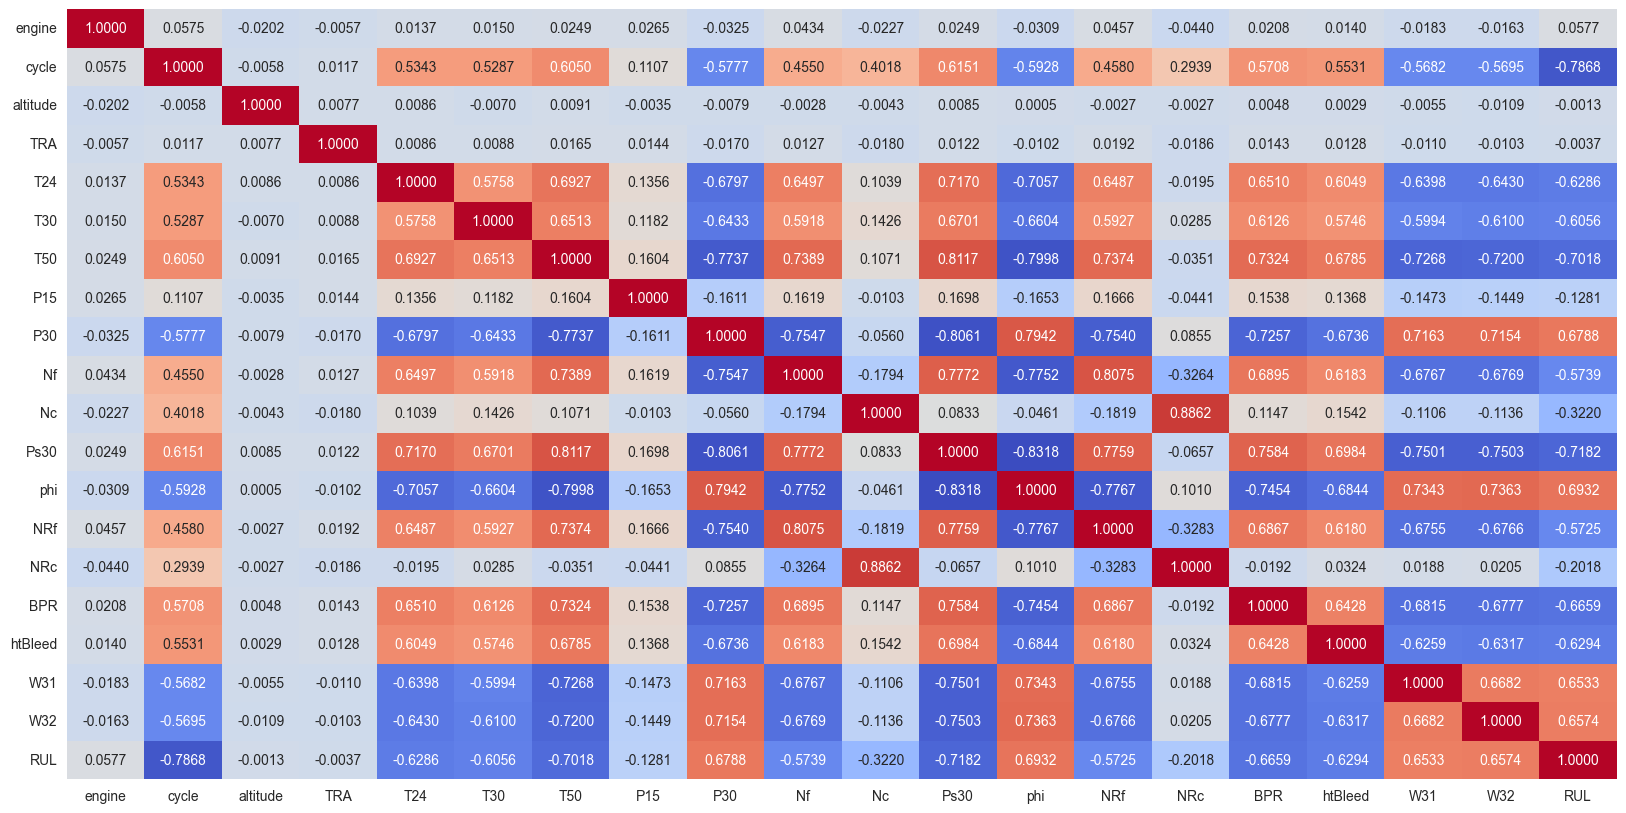

In [9]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')# coolwarm

features = df1.columns
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df1[features].corr(method='spearman'), annot=True, fmt='.4f',
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('correlation_map.png', bbox_inches='tight', pad_inches=0.0)

In [10]:
# another way to calculate the RUL
df1['RUL2'] = 0
for engine_id in np.unique(df1.engine):
    end_of_life = np.max(df1.loc[df1['engine'] == engine_id, 'cycle'].values)
    df1.loc[df1['engine'] == engine_id, 'RUL2'] = end_of_life - df1.loc[df1['engine'] == engine_id, 'cycle']
df1.head()
df1 = df1.drop(['RUL2'], axis=1)
df1.head()

engine  cycle  altitude     TRA     T24      T30      T50    P15     P30       Nf  \
engine                                                                                        
1      0       1      2    0.0019 -0.0003  642.15  1591.82  1403.14  21.61  553.75  2388.04   
       1       1      3   -0.0043  0.0003  642.35  1587.99  1404.20  21.61  554.26  2388.08   
       2       1      4    0.0007  0.0000  642.35  1582.79  1401.87  21.61  554.45  2388.11   
       3       1      5   -0.0019 -0.0002  642.37  1582.85  1406.22  21.61  554.00  2388.06   
       4       1      6   -0.0043 -0.0001  642.10  1584.47  1398.37  21.61  554.67  2388.02   

               Nc   Ps30     phi      NRf      NRc     BPR  htBleed    W31      W32  RUL  
engine                                                                                    
1      0  9044.07  47.49  522.28  2388.07  8131.49  8.4318      392  39.00  23.4236  190  
       1  9052.94  47.27  522.42  2388.03  8133.23  8.4178      390  38.95  23.3442  189  
       2  9049.48  47.13  522.86  2388.08  8133.83  8.3682      392  38.88  23.3739  188  
       3  9055.15  47.28  522.19  2388.04  8133.80  8.4294      393  38.90  23.4044  187  
       4  9049.68  47.16  521.68  2388.03  8132.85  8.4108      391  38.98  23.3669  186

In [11]:
import math
import scipy.stats

/var/folders/38/nymsn4sn24d8qm6p02ymbys40000gn/T/ipykernel_53810/1623816874.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[642.15       642.35       642.35       642.37       642.1
 642.48       642.56       642.12       641.71       642.28
 642.06       643.07       642.35       642.43       642.13
 642.58       642.62       641.79       643.04       642.37
 642.77       642.14       642.38       642.77       642.16
 642.44       642.35       641.91       642.2        642.02
 642.33       642.71       642.54       642.44       642.54
 641.99       641.93       642.01       642.24       642.4
 642.25025    642.29875    642.246375   642.1709375  642.202875
 642.26125    642.38075    642.4438125  642.5630625  642.6559375
 642.7266875  642.6514375  642.4470625  642.31625    642.258375
 642.2153125  642.15275    642.175      642.207625   642.268
 642.3295625  642.3043125  642.348125   642.4245625  642

Text(0.5, 1.0, 'Engine100')

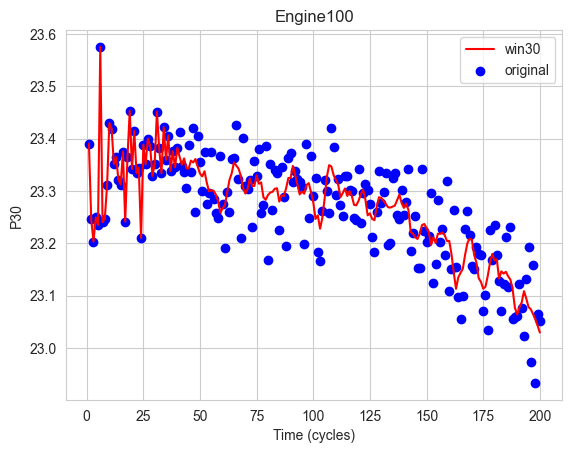

In [12]:
window_size = 40
from scipy.signal import savgol_filter

for sensor_name in sensor_names:
    df1[sensor_name + '2'] = 0

for engine_id in np.unique(df1.engine):
    for sensor_name in sensor_names:
        if sensor_name in df.columns:
            sensor_data = df1.loc[df1['engine'] == engine_id, sensor_name]
            smoothed_data = sensor_data.rolling(window_size).mean()
            smoothed_data = savgol_filter(sensor_data, 10, 2)
            smoothed_data[:window_size] = sensor_data[:window_size]
            df1.loc[df1['engine'] == engine_id, sensor_name + '2'] = smoothed_data

time_engine1 = df1.loc[df1['engine'] == engine_id, 'cycle']
smoothed_data = df1.loc[df1['engine'] == engine_id, sensor_name + '2']
sensor_data = df1.loc[df1['engine'] == engine_id, sensor_name]

plt.plot(time_engine1, smoothed_data, label='win30', c='red')
plt.scatter(time_engine1, sensor_data, label='original', c='blue')
plt.legend()
plt.xlabel('Time (cycles)')
plt.ylabel('P30')
plt.title('Engine' + str(engine_id))


In [13]:
y1 = df1['RUL']/400
X1 = df1.drop(['RUL', 'engine'], axis=1)

y_1_train = y1[df1.engine.values < 70]
y_1_test = y1[df1.engine.values >= 70]

X1_train = X1.loc[df1.engine < 70, :]
X1_test = X1.loc[df1.engine >= 70, :]

for col in X1_train.columns:
    if np.std(X1_train[col].values) != 0:
        X1_train.loc[:,col] = (X1_train[col].values - np.mean(X1_train[col].values)) / np.std(X1_train[col].values)
    else:
        X1_train.loc[:,col] = 1
for col in X1_train.columns:
    if np.std(X1_test.loc[:,col].values) != 0:
        X1_test.loc[:,col] = (X1_test[col].values - np.mean(X1_test[col].values)) / np.std(X1_test[col].values)
    else:
        X1_test.loc[:, col] = 1

/var/folders/38/nymsn4sn24d8qm6p02ymbys40000gn/T/ipykernel_53810/3532897455.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.56316251 -1.54818588 -1.53320925 ...  3.79847207  3.8134487
  3.82842534]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X1_train.loc[:,col] = (X1_train[col].values - np.mean(X1_train[col].values)) / np.std(X1_train[col].values)
/var/folders/38/nymsn4sn24d8qm6p02ymbys40000gn/T/ipykernel_53810/3532897455.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.77631183 -2.05979937 -0.77631183 ...  1.79066326  1.79066326
  2.43240703]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X1_train.loc[:,col] = (X1_train[col].values - np.mean(X1_train[col].values)) / np.std(X1_train[col].values)
/var/folders/38/nymsn4sn24d8qm6p02ymbys40000g

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn import neural_network

knn = neighbors.KNeighborsRegressor(10)
knn.fit(X1_train, y_1_train)
predictions = knn.predict(X1_test)

errors = predictions - (y_1_test)
print(np.mean(np.abs(errors))*400)
print(np.sqrt(np.mean(np.power(errors,2)))*400)

rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X1_train, y_1_train)
predictions = rfr.predict(X1_test)

errors = predictions - (y_1_test)
print(np.mean(np.abs(errors))*400)
print(np.sqrt(np.mean(np.power(errors,2)))*400)

rfr = neural_network.MLPRegressor()
rfr.fit(X1_train, y_1_train)
predictions = rfr.predict(X1_test)

errors = predictions - (y_1_test)
print(np.mean(np.abs(errors))*400)
print(np.sqrt(np.mean(np.power(errors,2)))*400)

30.39206086170533
42.72506366384775
31.372889417132043
43.13407155086819
31.80727802669821
42.99737759448471


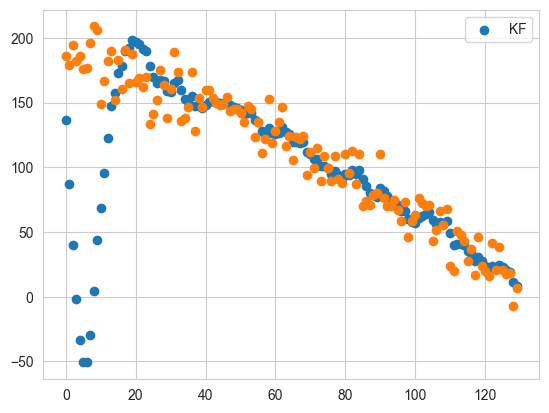

In [86]:
from filterpy.kalman import KalmanFilter
# dim_x = Number of state variables for the Kalman filter
# dim_z = Number of measurement inputs.
f = KalmanFilter (dim_x=2, dim_z=2)

f.x = np.array([[predictions[0]*400], [-1]]) # state initial state
f.F = np.array([[1, 1], [0, 1]]) # state transition function
f.H = np.array([[1, 0], [1, 0]]) # Measurement function
f.P = np.array([[1,0], [0, 0]]) # State noise
f.R = np.array([[1000,0], [0, 1000]]) # Measurement noise

filtered_predictions = []
for prediction, actual in zip(predictions[:130], y_1_test[:130]):
    z = [[prediction * 400], [prediction*400]]
    f.predict()
    f.update(z)
    filtered_predictions.append(f.x)

filtered_predictions_single_rul = []
for rul, decrease in filtered_predictions:
    filtered_predictions_single_rul.append(rul[0])

plt.scatter(range(len(filtered_predictions_single_rul)), filtered_predictions_single_rul, label='KF')
plt.scatter(range(len(predictions[:130])), predictions[:130]*400)
plt.legend()